# Steps involved in Natural Language Processing

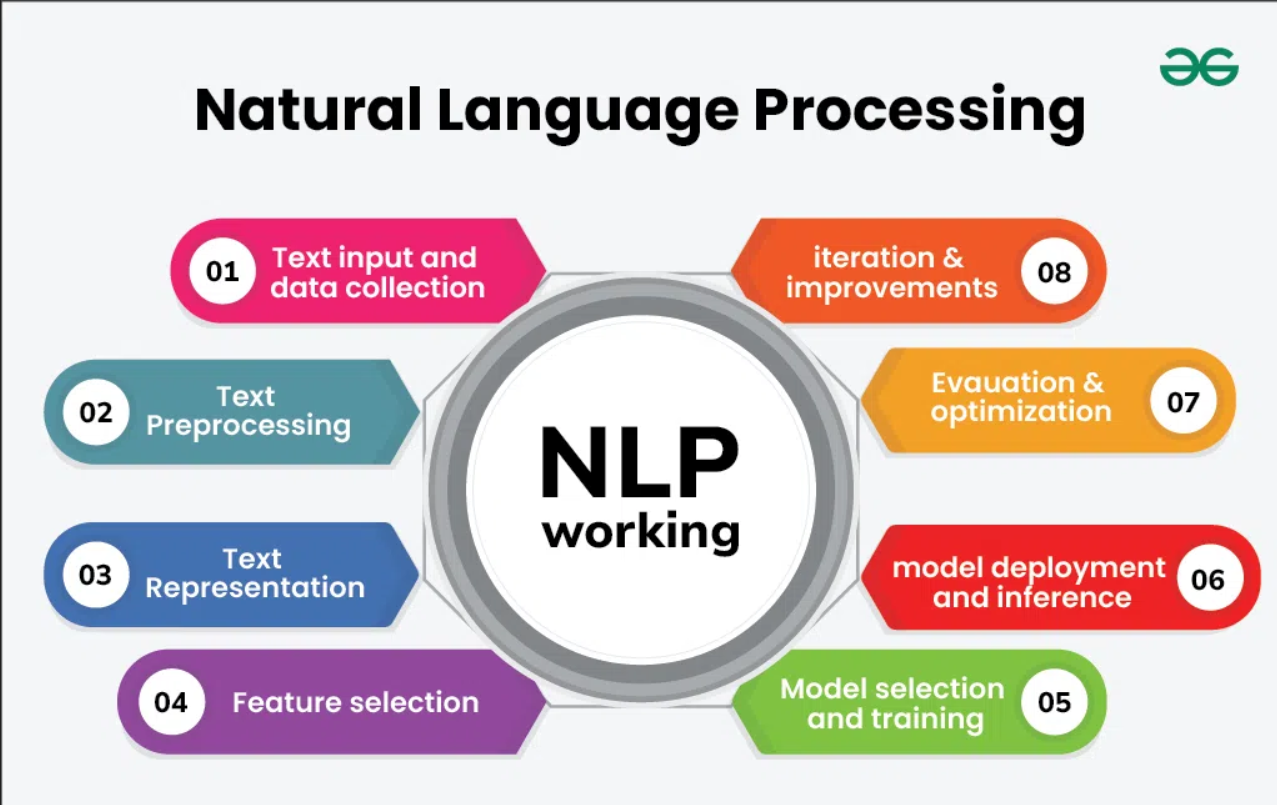

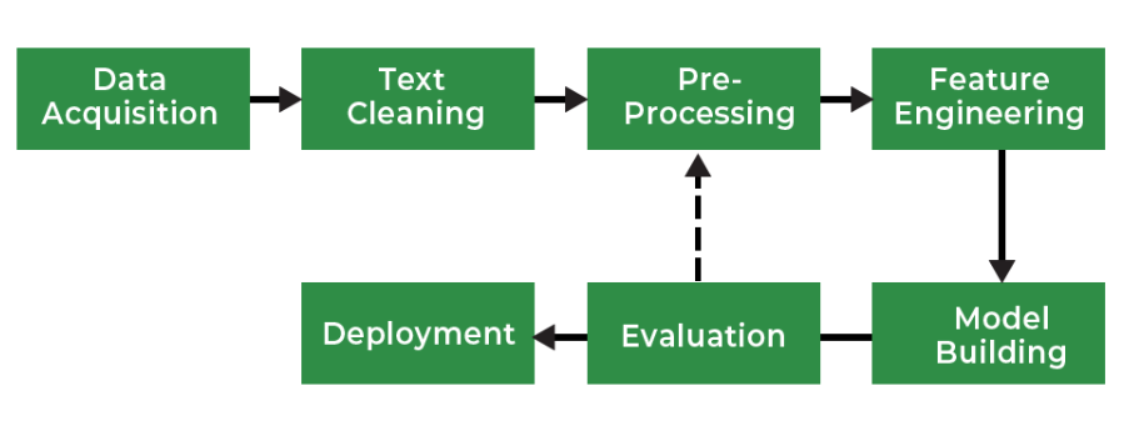

# 1. Text Input and Data Collection

- **Data Collection**: Gathering text data from various sources such as websites, books, social media or proprietary databases.
    - **Public Dataset**:  We can search for publicly available data as per problem statement.
    - **Web Scrapping**: Web Scrapping is a technique to scrap data from a website.*Beautiful Soup* can be used to scrape the text data from the web page.
    - **Image to Text**:  We can also scrap the data from the image files with the help of  *Optical character recognition (OCR)*. There is a library Tesseract that uses OCR to convert image to text data.
    - **pdf to Text**:  We have multiple Python packages to convert the data into text. With the *PyPDF2* library, pdf data can be extracted in the .text file.
    - **Data augmentation**: if our acquired data is not very sufficient for our problem statement then we can generate fake data from the existing data by *Synonym replacement, Back Translation, Bigram flipping, or Adding some noise in data*. This technique is known as Data augmentation.

- **Data Storage**: Storing the collected text data in a structured format, such as a database or a collection of documents.

# 2. Text Cleaning and Preprocessing

## Text Cleaning

Acquired Text data might contain html tags, special characters or misspelled.
- **Unicode Normalization**: if text data may contain symbols, emojis, graphic characters, or special characters. Either these characters can be removed or convert to machine-readable text. ex: text= "Hello!!!", text.encode('utf-8')

- **Regex or Regular Expression**: Regular Expression is the tool that is used for searching the string of specific patterns

- **Spelling corrections**: To overcome this problem we can create a corpus or dictionary of the most common mistype words and replace these common mistakes with the correct word.


In [ ]:
import re

text = """<gfg>
#GFG Geeks Learning together
url <https://www.geeksforgeeks.org/>,
email <acs@sdf.dv>
"""

def clean_text(text):
    # The original regex `[<,#*?>]` removes specific characters, not full HTML tags.
    # It also removes markdown characters like #.
    # Using a raw string avoids SyntaxWarning for potential escape sequences.
    html_chars = re.compile(r'[<,#*?>]')
    text = html_chars.sub(r'', text)

    # Remove urls:
    # Using a raw string avoids SyntaxWarning for `\S`.
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)

    # Remove email id:
    # The original regex `[A-Za-z0-2]+@[\w]+.[\w]+` had an unescaped dot `.` which matches any character.
    # It should be `\.` to match a literal dot.
    # Using a raw string avoids SyntaxWarning for `\w`.
    # Note: The character set `[A-Za-z0-2]` is very restrictive for email local parts.
    # The regex `r'[A-Za-z0-2]+@[\w]+\.[\w]+'` matches the structure of the email in the example (`acs@sdf.dv`).
    email = re.compile(r'[A-Za-z0-2]+@[\w]+\.[\w]+')
    text = email.sub(r'', text)

    return text

print(clean_text(text))


gfg
GFG Geeks Learning together
url 
email 



## Text Preprocessing

Preprocessing is crucial to clean and prepare the raw text data for analysis. Common preprocessing steps include:

- **Tokenization**: Splitting text into smaller units like words or sentences. Preferred to perform Sentence Tokenization followed by Word Tokenization
- **Lowercasing**: Converting all text to lowercase to ensure uniformity.
- **Stopword Removal**: Removing common words that do not contribute significant meaning, such as “and,” “the,” “is.”
- **Number and Punctuation Removal**: Removing punctuation marks.
- **Stemming and Lemmatization**: Reducing words to their base or root forms. Stemming cuts off suffixes, while lemmatization considers the context and converts words to their meaningful base form.
- **Text Normalization**: Standardizing text format, including correcting spelling errors, expanding contractions and handling special characters.
- **POS tagging - Parts of Speech Tagging**: POS tagging involves assigning a part of speech tag to each word in a text. This step is commonly used in various NLP tasks such as named entity recognition, sentiment analysis, and machine translation.
- **Named Entity Recognition (NER)**: NER involves identifying and classifying named entities in text, such as people, organizations, and locations. This step is commonly used in various NLP tasks such as information extraction, machine translation, and question-answering.
- **Emoji Removal**

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> i


    Error loading i: Package 'i' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars

True

In [5]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import string

In [42]:
# sample text to be preprocessed
text = 'I am learning NLP and it is very interesting. Content is taken from GeeksforGeeks'

In [44]:
# tokenize the text
tokens = word_tokenize(text)
tokens

['I',
 'am',
 'learning',
 'NLP',
 'and',
 'it',
 'is',
 'very',
 'interesting',
 '.',
 'Content',
 'is',
 'taken',
 'from',
 'GeeksforGeeks']

In [17]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
filtered_tokens

['learning', 'NLP', 'interesting', '.', 'Content', 'taken', 'GeeksforGeeks']

In [50]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
# perform stemming and lemmatization
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


In [52]:
stemmed_tokens

['learn', 'nlp', 'interest', '.', 'content', 'taken', 'geeksforgeek']

In [53]:
lemmatized_tokens

['learning', 'NLP', 'interesting', '.', 'Content', 'taken', 'GeeksforGeeks']

In [54]:
# remove digits and punctuation
cleaned_tokens = [token for token in lemmatized_tokens
				if not token.isdigit() and not token in string.punctuation]

In [55]:
cleaned_tokens

['learning', 'NLP', 'interesting', 'Content', 'taken', 'GeeksforGeeks']

In [56]:
# convert all tokens to lowercase
lowercase_tokens = [token.lower() for token in cleaned_tokens]
lowercase_tokens

['learning', 'nlp', 'interesting', 'content', 'taken', 'geeksforgeeks']

In [57]:
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [32]:
from nltk import pos_tag

In [58]:
# perform part-of-speech (POS) tagging
pos_tags = pos_tag(lowercase_tokens)
pos_tags

[('learning', 'VBG'),
 ('nlp', 'JJ'),
 ('interesting', 'JJ'),
 ('content', 'NN'),
 ('taken', 'VBN'),
 ('geeksforgeeks', 'NN')]

In [59]:
!pip install nltk
import nltk

nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
from nltk.chunk import ne_chunk


In [61]:
# perform named entity recognition (NER)
named_entities = ne_chunk(pos_tags)

In [63]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.3 MB/s eta 0:00:00


In [64]:
from svgling import draw_tree

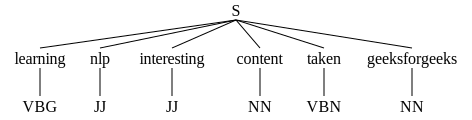

In [65]:
named_entities

In [66]:

# print the preprocessed text
print("Original text:", text)
print("Preprocessed tokens:", lowercase_tokens)
print("POS tags:", pos_tags)
print("Named entities:", named_entities)


Original text: I am learning NLP and it is very interesting. Content is taken from GeeksforGeeks
Preprocessed tokens: ['learning', 'nlp', 'interesting', 'content', 'taken', 'geeksforgeeks']
POS tags: [('learning', 'VBG'), ('nlp', 'JJ'), ('interesting', 'JJ'), ('content', 'NN'), ('taken', 'VBN'), ('geeksforgeeks', 'NN')]
Named entities: (S
  learning/VBG
  nlp/JJ
  interesting/JJ
  content/NN
  taken/VBN
  geeksforgeeks/NN)


# 3. Text Representation/ Feature Engineering

**Text-> Vectors-> Algorithm**
- Algorithm might be ML or DNN
    - For ML - Use One-Hot Encoder -> Sparse Matrix
    - For DNN - Use BoW, n-grams, TF-IDF, Semmantic Meaning - W2V & Glove -> Dense Vector

- **Bag of Words (BoW)**: Representing text as a collection of words, ignoring grammar and word order but *keeping track of word frequency*.
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: A statistic that reflects the *importance of a word in a document relative to a collection of documents*.
- **Word Embeddings**: Using **dense vector representations of words where semantically similar words are closer together** in the vector space (e.g., Word2Vec, GloVe).

Classical or Traditional Approach: One-Hot Encoder - Only for ML Algorithms

or Use below techniques

1. Count Based Approach
  - Bag of Word - BoW
  - TF-IDF (Term Frequency – Inverse Document Frequency)
  - Bag of n-grams
2. Distributed Representations (Dense Representations / Embeddings)
  - Word Embeddings (Static)
    - Word2Vec by Google (Skip-gram, CBOW)
    - GloVe by Stanford(Global Vectors for Word Representation)
    - FastText by Facebook
  - Sentence/Document Embeddings
    - Paragraph Vectors (Doc2Vec)
    - Sentence-BERT (SBERT)
  - Contextual Embeddings
    - ELMo (Embeddings from Language Models)
    - BERT (Bidirectional Encoder Representations from Transformers)
    - GPT (Generative Pre-trained Transformer) and similar models (RoBERTa, XLNet, ALBERT, ELECTRA, T5, etc.)
3. Sub-word Unit Representations
  - Character Embeddings
  - Byte Pair Encoding (BPE), WordPiece, SentencePiece
4. External Features
  - Linguistic Features:
    - Part-of-Speech (POS) tags (counts or sequences)
    - Dependency parsing features
    - Named Entity Recognition (NER) features (e.g., count of persons,    - organizations)
    - Sentiment scores (if using an external sentiment analyzer)
    - Readability scores (Flesch-Kincaid, etc.)
    - Presence of specific linguistic patterns
  - Statistical Features:
    - Text length (word count, character count)
    - Number of unique words (vocabulary richness)
    - Average word length
    - Punctuation counts (exclamation marks, question marks)
    - Capitalization patterns
  - Metadata / Domain-Specific Features:
    - Author information (if available)
    - Source or platform
    - Timestamp (day of week, time of day)
    - Specific keywords or jargon relevant to the domain
    - Features derived from structured data associated with the text




# 4. Feature Extraction

Extracting meaningful features from the text data that can be used for various NLP tasks.

- **N-grams**: Capturing sequences of N words to preserve some context and word order.
- **Syntactic Features**: Using parts of speech tags, syntactic dependencies and parse trees.
- **Semantic Features**: Leveraging word embeddings and other representations to capture word meaning and context.

# 5. Model Selection and Training

Selecting and training a machine learning or deep learning model to perform specific NLP tasks.

- **Supervised Learning**: Using labeled data to train models like *Support Vector Machines (SVM), Random Forests* or *deep learning models like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs)*.
- **Unsupervised Learning**: Applying techniques like *clustering or topic modeling* (e.g., Latent Dirichlet Allocation) on unlabeled data.
- **Pre-trained Models**: Utilizing pre-trained language models such as *BERT, GPT or transformer-based models* that have been trained on large corpora.


1. **Heuristic-Based Model**
  - Lexicon-Based-Sentiment- Analysis: Works by counting Positive and Negative words in sentences.
  - Wordnet: It has a database of words with synonyms, hyponyms, and meronyms. It uses this database for solving rule-based NLP tasks.

2. **Machine Learning Model**

  - **Logistic Regression**: Logistic regression is a linear model used for binary classification tasks. It predicts the probability of a categorical outcome (e.g., spam vs. non-spam emails) and is interpretable, making it a popular choice for text classification
  
  - **Naive Bayes**: It is used for the **classification task**. It is a group of classification algorithms based on Bayes’ Theorem. It assumes that each feature has an equal and independent contribution to the outcomes. Naive Bayes is often used for **document classification tasks, such as sentiment analysis or spam filtering**.

  - **Support Vector Machine**: This is also used for **classification tasks**. It is a popular supervised learning algorithm used for **classification and regression analysis**. It attempts to find the **best hyperplane that separates the data points into different classes while maximizing the margin between the hyperplane and the closest data points**. In the context of NLP, SVM is often used for **text classification tasks, such as sentiment analysis or topic classification.**

  - **Random Forest**

  - **XgBoost**

  - **Decision Tree**

  - **KNN**

  - **Hidden Markov Model**: HMM is a **statistical model used to represent a sequence of observations that are generated by a sequence of hidden states**. In the context of NLP, HMM is often used for **speech recognition, part-of-speech tagging, and named entity recognition**. HMM assumes that the state transitions are dependent only on the current state and the observation is dependent only on the current state.

  - **Conditional Random Fields**: CRF is a type of **probabilistic graphical model used for modeling sequential data where the output is a sequence of labels**. It is similar to HMM, but unlike HMM, CRF can **take into account more complex dependencies between the output labels**. In the context of NLP, CRF is often used for **named entity recognition, part-of-speech tagging, and information extraction**. CRF can handle more complex input features, making it more powerful than HMM.

3. **Deep Learning Model**

  - Recurrent neural networks (RNN)
  - Long Short-Term Memory (LSTM)
  - GRU (Gated Recurrent Unit)
  - Transformers - Seq2Seq - BERT/BART & GPT

# 6. Model Deployment and Inference

Deploying the trained model and using it to make predictions or extract insights from new text data.

- **Text Classification**: Categorizing text into predefined classes (e.g., spam detection, sentiment analysis).
- **Named Entity Recognition (NER)**: Identifying and classifying entities in the text.
- **Machine Translation**: Translating text from one language to another.
- **Question Answering**: Providing answers to questions based on the context provided by text data.

1. Export the trained model
2. Prepare the input pipeline
3. Set up the inference service
4. Monitor performance and scale
5. Continuous improvement

For Deployment, use

- Chatbot
- API
- Flask
- AWS
- Azure
- GCP
- heroku

# 7. Evaluation and Optimization

Evaluating the performance of the NLP algorithm using metrics such as accuracy, precision, recall, F1-score and others.

- **Hyperparameter Tuning**: Adjusting model parameters to improve performance.
- **Error Analysis**: Analyzing errors to understand model weaknesses and improve robustness.


  - **Classification**: Accuracy, Precision, Recall, F1-score, AUC
  - **Sequence Labelling**: Fl-Score
  - **Information Retrieval** : Mean Reciprocal rank(MRR), Mean Average Precision (MAP)
  - **Text summarization**: ROUGE
  - **Regression** [Stock Market Price predictions, Temperature Predictions]: Root Mean quare Error, Mean Absolute Percentage Error
  - **Text Generation**: BLEU (Bi-lingual Evaluation Understanding), Perplexity
  - **Machine Translation**: BLEU (Bi-lingual Evaluation Understanding), METEOR



# Reference

- https://www.geeksforgeeks.org/natural-language-processing-overview/?

- https://www.geeksforgeeks.org/natural-language-processing-nlp-pipeline/?